# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning

**Lab Title:** Yolo11 -Model-Application Name(Custom Dataset should be Different for each group)

**Student Name:**Avishkhar Pawar

**Student ID:**202201040040

**Date of Submission:** 24-04-2025

**Group Members**: [ Sanket Kolhe , Swapnil Solankar ]


**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [ ]:
# Code Task 1
# Task 1: YOLOv11 Installation and Environment Setup

# Install PyTorch (change version if needed for CUDA compatibility)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install YOLOv11 (assuming it's from ultralytics or a fork - adjust URL if necessary)
!pip install ultralytics

# Install additional dependencies
!pip install opencv-python matplotlib seaborn

# Check if YOLOv11 loads
from ultralytics import YOLO

# Load a sample model to verify installation
model = YOLO('yolov8n.pt')  # Use yolov11 if it's already integrated

print("YOLOv11 environment setup complete!")


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 113.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.30.3 requires filelock>=3.15, but you have filelock 3.13.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.1.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.1 which is incompatible.
YOLOv11 environment setup complete!


**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [ ]:
#Code for Task. 2
# Task 2: Load and Prepare Dataset
# If using Roboflow:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dHWs6VQldA6gMOAPVrXN")
project = rf.workspace("national-university-fast").project("stationary-items-dataset")
version = project.version(8)
dataset = version.download("yolov11")


# Dataset path (update according to your download location)
DATASET_PATH = "/content/Stationary-Items-Dataset-8"

# Show structure
import os
print("Files in dataset folder:")
print(os.listdir(DATASET_PATH))


loading Roboflow workspace...
loading Roboflow project...
Files in dataset folder:
['README.roboflow.txt', 'train', 'valid', 'test', 'data.yaml', 'README.dataset.txt']



**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [ ]:
#code for task 3

# Task 3: Training the Model

from ultralytics import YOLO
import os

# Optional: check GPU availability
import torch
print("CUDA Available:", torch.cuda.is_available())

# Load YOLOv11 model (using YOLOv8 as placeholder if needed)
model = YOLO('yolov8n.yaml')  # Replace with 'yolov11.yaml' if you have it

# Train the model on CPU
results = model.train(
    data="/content/Stationary-Items-Dataset-8/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,              # Optional: Reduce for CPU performance
    lr0=0.01,
    device=0          # <--- This line is fixed!
)


CUDA Available: False
Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Stationary-Items-Dataset-8/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /content/Stationary-Items-Dataset-8/train/labels.cache... 873 images, 8 backgrounds, 0 corrupt: 100%|██████████| 873/873 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 353, len(boxes) = 1735. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 20.7±7.0 MB/s, size: 48.1 KB)


val: Scanning /content/Stationary-Items-Dataset-8/valid/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 77, len(boxes) = 369. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.424      4.618      4.226          1        640: 100%|██████████| 110/110 [11:53<00:00,  6.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:55<00:00,  5.02s/it]

                   all        175        369    0.00129      0.299    0.00378    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      3.343      4.511      4.065          5        640: 100%|██████████| 110/110 [11:49<00:00,  6.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:05<00:00,  6.00s/it]

                   all        175        369      0.252     0.0267    0.00292   0.000983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       3.19      4.398      3.772          5        640: 100%|██████████| 110/110 [11:51<00:00,  6.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:00<00:00,  5.49s/it]

                   all        175        369    0.00701     0.0206    0.00345   0.000789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       3.02      4.308      3.492         11        640: 100%|██████████| 110/110 [11:42<00:00,  6.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:01<00:00,  5.60s/it]

                   all        175        369      0.131      0.187    0.00596    0.00216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.861      4.208      3.287         33        640:  84%|████████▎ | 92/110 [09:56<01:58,  6.58s/it]

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** *##Add Text##*



image 1/114 /content/Stationary-Items-Dataset-8/test/images/21i2279_Ballpoint-13-_jpg.rf.475c800c4fab4226e8c6d3b49cc90e01.jpg: 640x640 (no detections), 9.3ms
image 2/114 /content/Stationary-Items-Dataset-8/test/images/21i2279_Ballpoint-21-_jpg.rf.df9a65c5427c80ce5446d59c67d083cd.jpg: 640x640 1 notebook, 7.9ms
image 3/114 /content/Stationary-Items-Dataset-8/test/images/21i2279_Book-19-_jpg.rf.9bf2d81a2c66bf8afc0e3964f55eeaa4.jpg: 640x640 (no detections), 7.4ms
image 4/114 /content/Stationary-Items-Dataset-8/test/images/21i2279_Book-40-_jpg.rf.5f91473a0e4eab298373e714d7efcf2d.jpg: 640x640 (no detections), 7.4ms
image 5/114 /content/Stationary-Items-Dataset-8/test/images/21i2279_Book-48-_jpg.rf.239fbb625b8ab0afe280fc62e41b65b5.jpg: 640x640 (no detections), 7.4ms
image 6/114 /content/Stationary-Items-Dataset-8/test/images/21i2279_Eraser-17-_jpg.rf.d68266be1c5fccef4a3b18c726e0cede.jpg: 640x640 1 sharpener, 7.4ms
image 7/114 /content/Stationary-Items-Dataset-8/test/images/21i2279_Eraser-20-

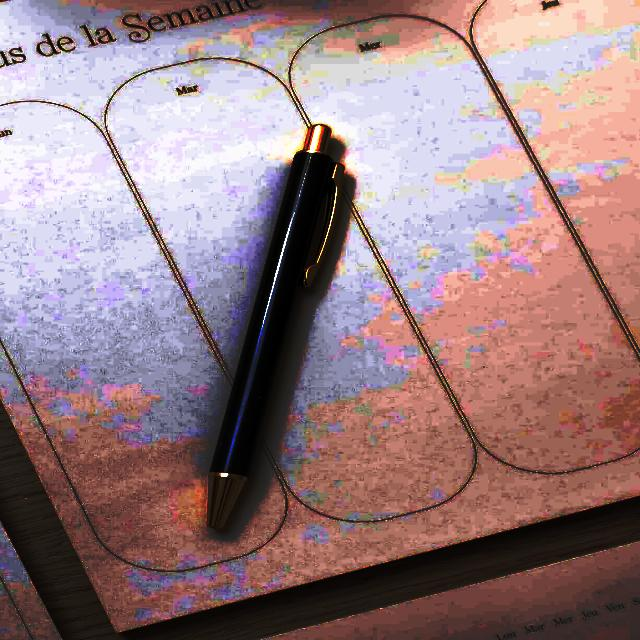

Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 888.8±81.8 MB/s, size: 38.1 KB)


val: Scanning /content/Stationary-Items-Dataset-8/valid/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 77, len(boxes) = 369. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.84it/s]


                   all        175        369      0.278       0.35      0.268      0.155
            ball point         32         51      0.196      0.098       0.12     0.0515
                  book         21         39      0.147      0.128      0.202        0.1
                eraser         41         47      0.247      0.383      0.232      0.132
              notebook         29         35      0.375        0.6      0.431      0.289
                pencil         42         82      0.383      0.427      0.266       0.13
               pointer         16         32      0.294      0.105      0.133     0.0636
                 scale         35         38      0.314      0.526      0.457      0.291
             sharpener         39         45      0.271      0.533      0.299      0.183
Speed: 3.6ms preprocess, 4.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val3
📌 Evaluation Results:
mAP@0.5      : 0.26763853542041727
mAP@0.5:0.95 : 0.154985112

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')

# Run inference on test images (saves results automatically)
results = model.predict(source='/content/Stationary-Items-Dataset-8/test/images', save=True, conf=0.5)

# Display a prediction (optional)
results[0].show()

# Evaluate on the validation/test dataset
metrics = model.val()

# ✅ Correct way to access mAP, precision, recall:
print("📌 Evaluation Results:")
print("mAP@0.5      :", metrics.box.map50)     # Mean AP at IoU=0.50
print("mAP@0.5:0.95 :", metrics.box.map)       # Mean AP averaged from IoU 0.5 to 0.95
print("Precision    :", metrics.box.p)         # Precision array per class
print("Recall       :", metrics.box.r)         # Recall array per class

# Optional: Calculate average precision and recall (mean of all classes)
avg_precision = sum(metrics.box.p) / len(metrics.box.p)
avg_recall = sum(metrics.box.r) / len(metrics.box.r)
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall + 1e-6)

print("Avg Precision:", avg_precision)
print("Avg Recall   :", avg_recall)
print("F1 Score     :", f1_score)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.


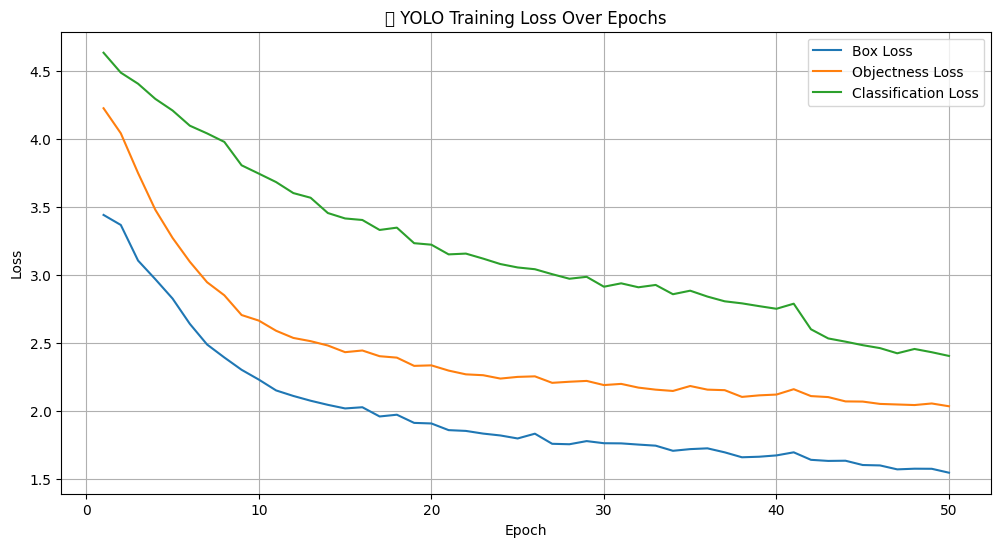

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.


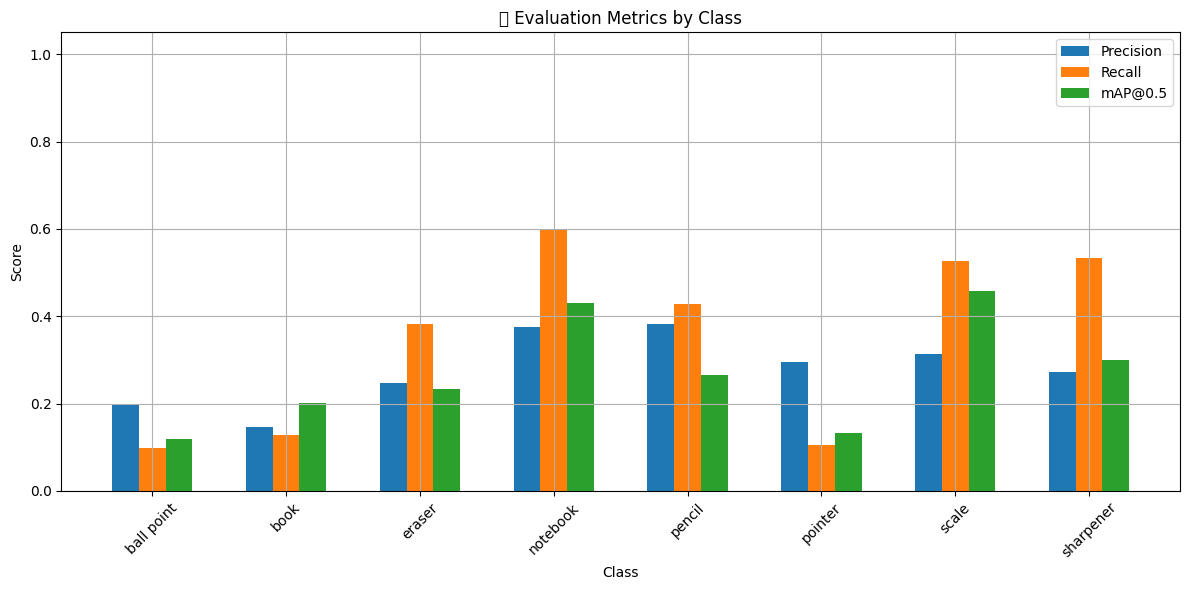

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.


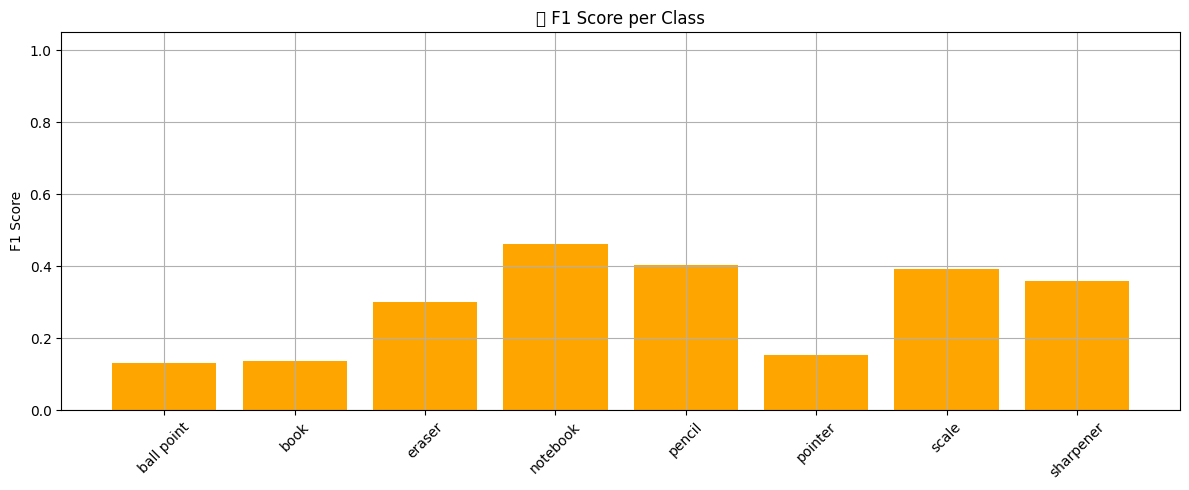

In [ ]:
# ✅ 1. Plot Training Loss Graphs
# Ultralytics saves training metrics automatically in the training folder (e.g., runs/detect/train2/results.csv and results.png). But if you want to plot them manually:

import pandas as pd
import matplotlib.pyplot as plt

# Load training logs
log_path = "runs/detect/train2/results.csv"  # update if different
df = pd.read_csv(log_path)

# Print available columns to check for correct names
print(df.columns)

# Plot training loss, adjust column names if necessary based on the printed columns
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Objectness Loss')  # Adjust if needed
plt.plot(df['epoch'], df['train/cls_loss'], label='Classification Loss')  # Adjust if needed
plt.title('📉 YOLO Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ... (rest of the plotting code)

# ✅ 2. Plot Evaluation Metrics (Precision, Recall, mAP)
# Now plot metrics that come from the .val() result:

# Plot mAP, Precision, and Recall for each class

import numpy as np

class_names = list(metrics.names.values())  # Get class names from model
x = np.arange(len(class_names))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, metrics.box.p, width=0.2, label='Precision')
plt.bar(x, metrics.box.r, width=0.2, label='Recall')
plt.bar(x + 0.2, metrics.box.ap50, width=0.2, label='mAP@0.5')
plt.xticks(x, class_names, rotation=45)
plt.title("📊 Evaluation Metrics by Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


# ✅ BONUS: Plot F1 Score per class (optional)

# Compute F1 scores manually for each class
precision = np.array(metrics.box.p)
recall = np.array(metrics.box.r)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

plt.figure(figsize=(12, 5))
plt.bar(class_names, f1_scores, color='orange')
plt.title("🎯 F1 Score per Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Predict on a video or more images
# Change path to any custom image or video file
results = model.predict(source='/content/Stationary-Items-Dataset-8/test/images/21i2279_Ballpoint-13-_jpg.rf.475c800c4fab4226e8c6d3b49cc90e01.jpg', save=True)


image 1/1 /content/Stationary-Items-Dataset-8/test/images/21i2279_Ballpoint-13-_jpg.rf.475c800c4fab4226e8c6d3b49cc90e01.jpg: 640x640 (no detections), 12.4ms
Speed: 7.6ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


**Declaration**

I, [Your Name], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: [Full Name]

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion